## **Setup**

In [5]:
# Add files to Google Colab
from google.colab import files
uploaded = files.upload()

Saving Mouse_metadata.csv to Mouse_metadata.csv
Saving Study_results.csv to Study_results.csv


In [169]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats

In [13]:
# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

## **Observations and Insights**

In [14]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [15]:
# Combine the data into a single dataset

merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview

merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [17]:
# Checking the number of mice.

len(merge_df["Mouse ID"].unique())

249

In [22]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = merge_df.loc[merge_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

print(duplicate_mice)

['g989']


In [28]:
# Optional: Get all the data for the duplicate mouse ID. 

show_duplicate = merge_df.loc[merge_df["Mouse ID"] == duplicate_mice[0], :]
print(show_duplicate)

    Mouse ID Drug Regimen  ... Tumor Volume (mm3)  Metastatic Sites
908     g989     Propriva  ...          45.000000                 0
909     g989     Propriva  ...          45.000000                 0
910     g989     Propriva  ...          48.786801                 0
911     g989     Propriva  ...          47.570392                 0
912     g989     Propriva  ...          51.745156                 0
913     g989     Propriva  ...          49.880528                 0
914     g989     Propriva  ...          51.325852                 1
915     g989     Propriva  ...          53.442020                 0
916     g989     Propriva  ...          55.326122                 1
917     g989     Propriva  ...          54.657650                 1
918     g989     Propriva  ...          56.045564                 1
919     g989     Propriva  ...          59.082294                 1
920     g989     Propriva  ...          62.570880                 2

[13 rows x 8 columns]


In [29]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = merge_df[merge_df["Mouse ID"].isin(duplicate_mice)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [30]:
# Checking the number of mice in the clean DataFrame.

len(clean_df["Mouse ID"].unique())

248

## **Summary Statisics**

In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

tv_byregimen = clean_df[["Drug Regimen","Tumor Volume (mm3)"]]
tv_byregimen

regimen = tv_byregimen.groupby(["Drug Regimen"])
regimen.count().head()

regimen_summary = pd.DataFrame({
    "Mean": regimen["Tumor Volume (mm3)"].mean().map('{:.2f}'.format),
    "Median": regimen["Tumor Volume (mm3)"].median().map('{:.2f}'.format),
    "Variance": regimen["Tumor Volume (mm3)"].var().map('{:.2f}'.format),
    "Standard Deviation": regimen["Tumor Volume (mm3)"].std().map('{:.2f}'.format),
    "SEM": regimen["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)
})

regimen_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

regimen_new = tv_byregimen.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": [np.mean, np.median, np.var, np.std, st.sem]})

regimen_new

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## **Bar and Pie Charts**

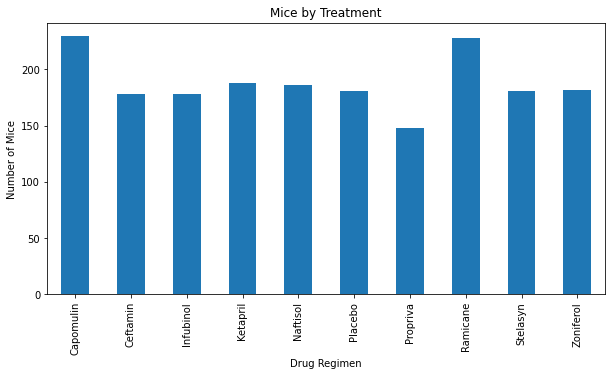

<Figure size 432x288 with 0 Axes>

In [87]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mice_byregimen = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
mice_byregimen

mice_byregimen.plot(kind="bar", figsize=(10,5))

#set chart title
plt.title("Mice by Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

#show chart and set layout
plt.show()
plt.tight_layout()


In [88]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

mice_byregimen

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Number of Mice')

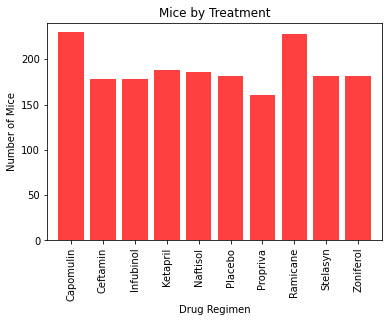

In [93]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

mice = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

x_axis = np.arange(len(mice_byregimen))

plt.bar(x_axis, mice, color='red', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice)+10)

plt.title("Mice by Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

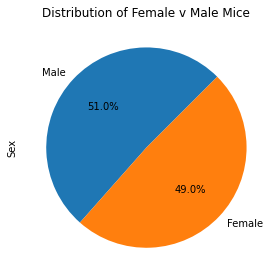

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex = clean_df["Sex"].value_counts()

plt.figure()
sex.plot(kind="pie", autopct='%1.1f%%', startangle = 45)
plt.tight_layout()
plt.title("Distribution of Female v Male Mice")
plt.tight_layout()
plt.show()

In [103]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex

Male      958
Female    922
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Distribution of Female v Male Mice')

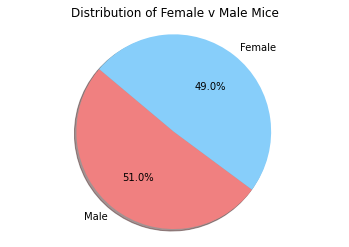

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male", "Female"]
sizes = [958, 922]
colors = ["lightcoral", "lightskyblue"]

plt.pie(sizes, explode=None, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

plt.title("Distribution of Female v Male Mice")

## **Quartiles, Outliers, and Boxplots**

In [129]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_tp = clean_df.groupby('Mouse ID').max()['Timepoint']

lasttp_df = pd.DataFrame(last_tp)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

lastmerge = pd.merge(lasttp_df, clean_df, on=("Mouse ID","Timepoint"),how="left")

lastmerge.head()


mice_treatment = lastmerge.loc[(lastmerge["Drug Regimen"] == "Capomulin") |
                               (lastmerge["Drug Regimen"] == "Ramicane") |
                               (lastmerge["Drug Regimen"] == "Infubinol") |
                               (lastmerge["Drug Regimen"] == "Ceftamin"), :]
mice_treatment

regimen_cap_df = mice_treatment.loc[mice_treatment["Drug Regimen"] == "Capomulin",:]
regimen_ram_df = mice_treatment.loc[mice_treatment["Drug Regimen"] == "Ramicane", :]
regimen_inf_df = mice_treatment.loc[mice_treatment["Drug Regimen"] == "Infubinol", :]
regimen_cef_df = mice_treatment.loc[mice_treatment["Drug Regimen"] == "Ceftamin", :]


In [137]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tv_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [119]:
#Capomulin Treatment

cap_tv = regimen_cap_df["Tumor Volume (mm3)"]

quartiles = cap_tv.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The interquartile range of tumor volumes for the Capomulin Treatment is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The interquartile range of tumor volumes for the Capomulin Treatment is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [127]:
#Ramicane Treatment

ram_tv = regimen_ram_df["Tumor Volume (mm3)"]

r_quartiles = ram_tv.quantile([.25,.5,.75])
r_lowerq = r_quartiles[0.25]
r_upperq = r_quartiles[0.75]
r_iqr = r_upperq-r_lowerq
print(f"The interquartile range of tumor volumes for the Ramicane Treatment is: {r_iqr}")

r_lower_bound = r_lowerq - (1.5*r_iqr)
r_upper_bound = r_upperq + (1.5*r_iqr)
print(f"Values below {r_lower_bound} could be outliers.")
print(f"Values above {r_upper_bound} could be outliers.")

The interquartile range of tumor volumes for the Ramicane Treatment is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [130]:
#Infubinol Treatment

inf_tv = regimen_inf_df["Tumor Volume (mm3)"]

i_quartiles = inf_tv.quantile([.25,.5,.75])
i_lowerq = i_quartiles[0.25]
i_upperq = i_quartiles[0.75]
i_iqr = i_upperq-i_lowerq
print(f"The interquartile range of tumor volumes for the Infubinol Treatment is: {i_iqr}")

i_lower_bound = i_lowerq - (1.5*i_iqr)
i_upper_bound = i_upperq + (1.5*i_iqr)
print(f"Values below {i_lower_bound} could be outliers.")
print(f"Values above {i_upper_bound} could be outliers.")

The interquartile range of tumor volumes for the Infubinol Treatment is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [131]:
#Ceftamin Treatment

cef_tv = regimen_cef_df["Tumor Volume (mm3)"]

c_quartiles = cef_tv.quantile([.25,.5,.75])
c_lowerq = c_quartiles[0.25]
c_upperq = c_quartiles[0.75]
c_iqr = c_upperq-c_lowerq
print(f"The interquartile range of tumor volumes for the Ceftamin Treatment is: {c_iqr}")

c_lower_bound = c_lowerq - (1.5*c_iqr)
c_upper_bound = c_upperq + (1.5*c_iqr)
print(f"Values below {c_lower_bound} could be outliers.")
print(f"Values above {c_upper_bound} could be outliers.")

The interquartile range of tumor volumes for the Ceftamin Treatment is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


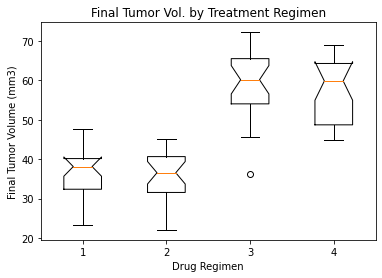

In [138]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

tv_plot = [cap_tv, ram_tv, inf_tv, cef_tv]

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Vol. by Treatment Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")

ax1.boxplot(tv_plot, treatments)

plt.show()

## **Line and Scatter Plots**

In [149]:
cap_mice = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]

cap_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


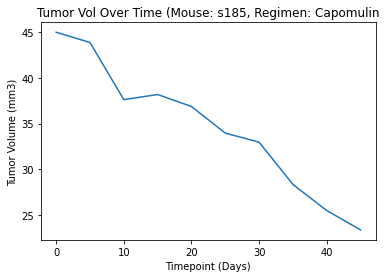

In [160]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

line_df = cap_mice.loc[cap_mice["Mouse ID"] == "s185",:]

x_axis = line_df["Timepoint"]
tumvol = line_df["Tumor Volume (mm3)"]

plt.plot(x_axis, tumvol)

plt.title("Tumor Vol Over Time (Mouse: s185, Regimen: Capomulin")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

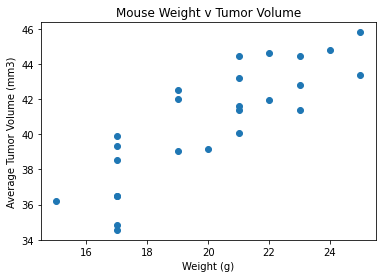

In [164]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

cap_avg = cap_mice.groupby(["Mouse ID"]).mean()

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])

plt.title("Mouse Weight v Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()


## **Correlation and Regression**

The correlation between mouse weight and average tumor volume is 0.84


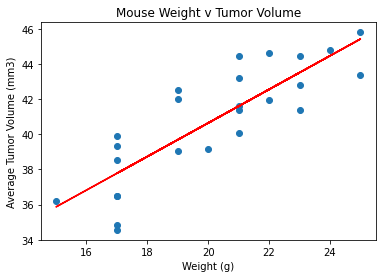

In [177]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

weight = cap_avg["Weight (g)"]
tumor_vol = cap_avg["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weight, tumor_vol)
regress_values = weight * slope + intercept

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])
plt.plot(weight, regress_values, "r-")
plt.title("Mouse Weight v Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()
